In [52]:
import pandas as pd

# The Dataset comes from:
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

# At face value, this looks like an easy lab;
# But it has many parts to it, so prepare yourself before starting...

In [53]:
def load(path_test, path_train):
  # Load up the data.
  # You probably could have written this..
  with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
  with open(path_train, 'r') as f: training = pd.read_csv(f)

  # The number of samples between training and testing can vary
  # But the number of features better remain the same!
  n_features = testing.shape[1]

  X_test  = testing.ix[:,:n_features-1]
  X_train = training.ix[:,:n_features-1]
  y_test  = testing.ix[:,n_features-1:].values.ravel()
  y_train = training.ix[:,n_features-1:].values.ravel()

  #
  # Special:

  return X_train, X_test, y_train, y_test

In [54]:
def peekData(X_train):
  # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
  print("Peeking your data...")
  fig = plt.figure()

  cnt = 0
  for col in range(5):
    for row in range(10):
      plt.subplot(5, 10, cnt + 1)
      plt.imshow(X_train.ix[cnt,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
      plt.axis('off')
      cnt += 1
  fig.set_tight_layout(True)
  plt.show()

In [55]:
def drawPredictions(X_train, X_test, y_train, y_test):
  fig = plt.figure()

  # Make some guesses
  y_guess = model.predict(X_test)


  #
  # INFO: This is the second lab we're demonstrating how to
  # do multi-plots using matplot lab. In the next assignment(s),
  # it'll be your responsibility to use this and assignment #1
  # as tutorials to add in the plotting code yourself!
  num_rows = 10
  num_cols = 5

  index = 0
  for col in range(num_cols):
    for row in range(num_rows):
      plt.subplot(num_cols, num_rows, index + 1)

      # 8x8 is the size of the image, 64 pixels
      plt.imshow(X_test.ix[index,:].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

      # Green = Guessed right
      # Red = Fail!
      fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
      plt.title('Label: %i' % y_guess[index], fontsize=6, color=fontcolor)
      plt.axis('off')
      index += 1
  fig.set_tight_layout(True)
  plt.show()

In [56]:
# TODO: Pass in the file paths to the .tes and the .tra files
X_train, X_test, y_train, y_test = load('C:/Users/t.bugaevskiy/Desktop/edX/08_DAT_210x_Programming_with_Python_for_Data_Science/Module6/Datasets/optdigits.tes',
                                        'C:/Users/t.bugaevskiy/Desktop/edX/08_DAT_210x_Programming_with_Python_for_Data_Science/Module6/Datasets/optdigits.tra')

Peeking your data...


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


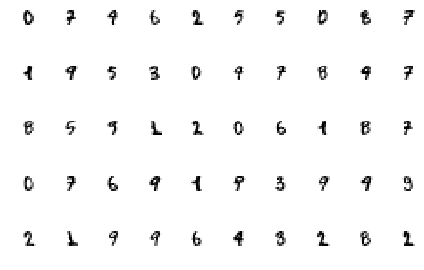

In [57]:
import matplotlib.pyplot as plt
from sklearn import svm
 
# Get to know your data. It seems its already well organized in
# [n_samples, n_features] form. Our dataset looks like (4389, 784).
# Also your labels are already shaped as [n_samples].
peekData(X_train)

In [58]:
# TODO: Create an SVC classifier. Leave C=1, but set gamma to 0.001
# and set the kernel to linear. Then train the model on the training
# data / labels:
    from sklearn.svm import SVC
print("Training SVC Classifier...")
model = SVC(kernel='rbf', C = 1, gamma = 0.001)
model = model.fit(X_train, y_train)

Training SVC Classifier...


In [59]:
# TODO: Calculate the score of your SVC against the testing data
print("Scoring SVC Classifier...")

score = model.score(X_test, y_test)

print("Score:\n", score)

Scoring SVC Classifier...
Score:
 0.982739420935


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


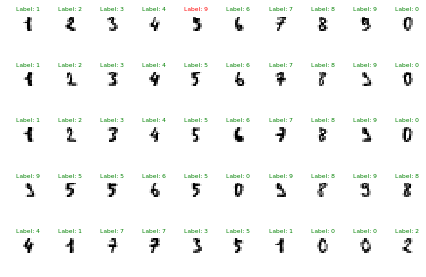

In [60]:
# Visual Confirmation of accuracy
drawPredictions(X_train, X_test, y_train, y_test)

In [61]:
# TODO: Print out the TRUE value of the 1000th digit in the test set
# By TRUE value, we mean, the actual provided label for that sample
true_1000th_test_value = y_test[999]
print("1000th test label: ", true_1000th_test_value)

1000th test label:  1


In [62]:
# TODO: Predict the value of the 1000th digit in the test set.
# Was your model's prediction correct?
# INFO: If you get a warning on your predict line, look at the
# notes from the previous module's labs.
guess_1000th_test_value = model.predict(X_test.ix[999])
print("1000th test prediction: ", guess_1000th_test_value)

1000th test prediction:  [1]


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


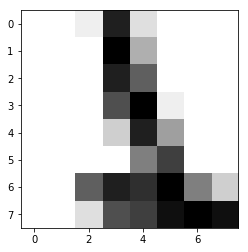

In [63]:
# TODO: Use IMSHOW to display the 1000th test image, so you can
# visually check if it was a hard image, or an easy image
plt.imshow(X_test.ix[999].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [64]:
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and change your SVC's kernel to 'poly' and re-run your lab
# again.

In [65]:
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and change your SVC's kernel to 'rbf' and re-run your lab
# again.

In [ ]:
# TODO: Were you able to beat the USPS advertised accuracy score
# of 98%? If so, STOP and answer the lab questions. But if you
# weren't able to get that high of an accuracy score, go back
# and tinker with your gamma value and C value until you're able
# to beat the USPS. Don't stop tinkering until you do. =).

In [66]:
#################################################

#
# TODO: Once you're able to beat the +98% accuracy score of the
# USPS, go back into the load() method. Look for the line that
# reads "# Special:"
#
# Immediately under that line, alter X_train and y_train ONLY.
# Keep just the ___FIRST___ 4% of the samples. In other words,
# for every 100 samples found, throw away 96 of them. Make sure
# all the samples (and labels) you keep come from the start of
# X_train and y_train.

# If the first 4% is a decimal number, then use int + ceil to
# round up to the nearest whole integer.

# That operation might require some Pandas indexing skills, or
# perhaps some numpy indexing skills if you'd like to go that
# route. Feel free to ask on the class forum if you want; but
# try to exercise your own muscles first, for at least 30
# minutes, by reviewing the Pandas documentation and stack
# overflow. Through that, in the process, you'll pick up a lot.
# Part of being a machine learning practitioner is know what
# questions to ask and where to ask them, so this is a great
# time to start!

# Re-Run your application after throwing away 96% your training
# data. What accuracy score do you get now?




#
# TODO: Lastly, change your kernel back to linear and run your
# assignment one last time. What's the accuracy score this time?
# Surprised?

